Laboratorio de Métodos cuantitativos para la Gestión


---

Clase de Integración 1.2



In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

❤ ⚛ ⛵

#Repaso integrales
Determine el excedente del consumidor y del productor para las funciones de demanda y oferta que se dan a continuación.

$D:
p = 120 − x^2$

$O: p = 32 + 3x $

In [56]:
x = sp.symbols('x')

In [57]:
P_d = (120 - x**2)

In [58]:
P_s = 32+3*x

Busquemos el punto de equilibrio

In [59]:
x_opt = sp.solve(sp.Eq(P_d, P_s), x)
x_opt #vamos a tomar la cantidad positiva

[-11, 8]

In [60]:
x_opt = sp.solve(sp.Eq(P_d, P_s), x)[1]

In [61]:
p_opt = P_s.subs(x, x_opt)
p_opt

56

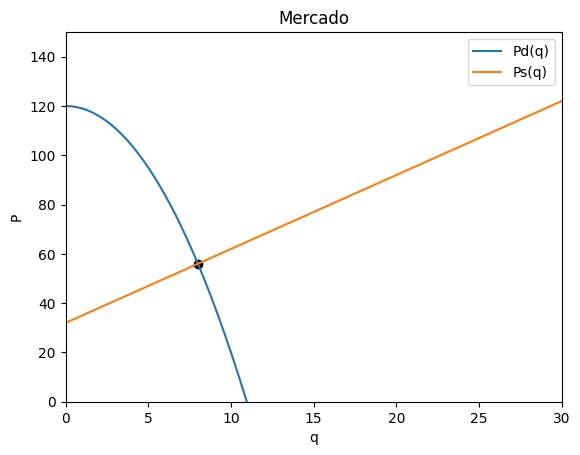

In [62]:
# @title

x_grid = np.linspace(0, 50, 500)
Pd_num = sp.lambdify(x, P_d)(x_grid)
Ps_num = sp.lambdify(x, P_s)(x_grid)
plt.figure()
plt.plot(x_grid, Pd_num, label='Pd(q)')
plt.plot(x_grid, Ps_num, label='Ps(q)')
plt.scatter([x_opt], [p_opt], c="black")
plt.title('Mercado')
plt.ylim(0, 150)
plt.xlim(0,30)
plt.xlabel('q')
plt.ylabel('P')
plt.legend()
plt.show()

Nuestra fórmula para el EC será: $$ EC = \int\limits_{0}^{q^*} [P_d(q) - P_d(q^*)] dq $$

Computémoslo.

In [63]:
EC=sp.integrate(P_d-p_opt, (x, 0, x_opt))

Nuestra fórmula para el EP será: $$ EP = \int\limits_{0}^{q^*} [P_s(q^*) - P_s(q)] dq $$

Computémoslo.

In [64]:
EP=sp.integrate(p_opt-P_s, (x, x_opt, 0))

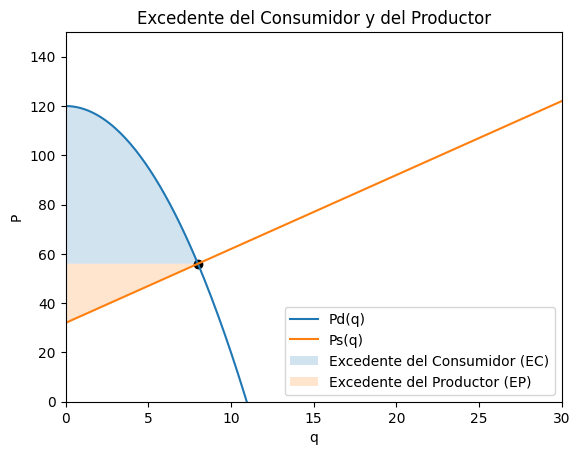

In [65]:
plt.figure()
plt.plot(x_grid, Pd_num, label='Pd(q)')
plt.plot(x_grid, Ps_num, label='Ps(q)')
plt.scatter([x_opt], [p_opt], c="black")

plt.fill_between(
    x_grid,
    Pd_num,
    float(p_opt),
    where=(x_grid <= float(x_opt)),
    alpha=0.2,
    label='Excedente del Consumidor (EC)'
)

plt.fill_between(
   x_grid,
    float(p_opt),
    Ps_num,
    where=(x_grid <= float(x_opt)),
    alpha=0.2,
    label='Excedente del Productor (EP)'
)

plt.title('Excedente del Consumidor y del Productor')
plt.xlabel('q')
plt.ylabel('P')
plt.xlim(0,30)
plt.ylim(0,150)
plt.legend()
plt.show()

Calcular el Deadweight Loss si se aplica un impuesto de suma fija t=7 a los productores

$O:(p-32)/3=x$ ➡ $(p-t-32)/3=x$ ➡ $p=3x+t+32$

In [66]:
t=sp.symbols('t')
P_s_t=3*x+t+32

In [67]:
P_s_t=P_s_t.subs(t,10)

In [68]:
x_opt_t = sp.solve(sp.Eq(P_d, P_s_t), x)
x_opt_t = [sol for sol in x_opt_t if sol > 0][0]
x_opt_t

-3/2 + sqrt(321)/2

In [69]:
p_opt_t = P_s_t.subs(x, x_opt_t)
p_opt_t

3*sqrt(321)/2 + 75/2

In [70]:
EC_t = sp.integrate(P_d - p_opt_t, (x, 0, x_opt_t))
EP_t = sp.integrate(p_opt_t - P_s_t, (x, 0, x_opt_t))
EC_t.evalf(), EP_t.evalf()

(276.577713147899, 83.4379360488699)

$$ DWL = \int\limits_{Q_{s}^{t}(p_{opt})}^{q_opt^{t}} [P_{s}^{t} (q) - P^{*}] \ dq + \int\limits_{q_opt^{t}}^{q_opt} [P_{d} (q) - P^{*}] \ dq $$

In [71]:
q_t_pviejo = sp.solve(sp.Eq(P_s_t, p_opt), x)[0]


DWL_int_1 = sp.integrate(
    P_s_t - p_opt,
    (x, q_t_pviejo, x_opt_t)
)
DWL_int_1.evalf()

11.6892926453542

In [72]:
DWL_int_2 = sp.integrate(
    P_d - p_opt,
    (x, x_opt_t, x_opt)
)
DWL_int_2.evalf()

2.29505815787728

In [73]:
DWL= DWL_int_1 + DWL_int_2
DWL.evalf()

13.9843508032315

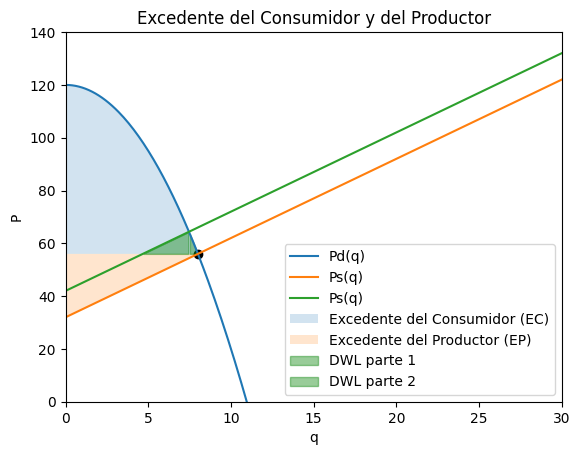

In [74]:
P_s_t_num = sp.lambdify(x, P_s_t)(x_grid)
plt.figure()
plt.plot(x_grid, Pd_num, label='Pd(q)')
plt.plot(x_grid, Ps_num, label='Ps(q)')
plt.plot(x_grid, sp.lambdify(x, P_s_t)(x_grid), label='Ps(q)')
plt.scatter([x_opt], [p_opt], c="black")

plt.fill_between(
    x_grid,
    Pd_num,
    float(p_opt),
    where=(x_grid <= float(x_opt)),
    alpha=0.2,
    label='Excedente del Consumidor (EC)'
)

plt.fill_between(
   x_grid,
    float(p_opt),
    Ps_num,
    where=(x_grid <= float(x_opt)),
    alpha=0.2,
    label='Excedente del Productor (EP)'
)


mask_dwl_1 = (x_grid >= float(q_t_pviejo)) & (x_grid <= x_opt_t)
plt.fill_between(x_grid, P_s_t_num, float(p_opt),
                 where=mask_dwl_1,
                 color='green', alpha=0.4,
                 label='DWL parte 1 ')



mask_dwl_2 = (x_grid >= x_opt_t) & (x_grid <= x_opt)
plt.fill_between(x_grid, float(p_opt), Pd_num,
                 where=mask_dwl_2,
                 color='green', alpha=0.4,
                 label='DWL parte 2')


plt.title('Excedente del Consumidor y del Productor')
plt.xlabel('q')
plt.ylabel('P')
plt.xlim(0,30)
plt.ylim(0,140)
plt.legend()
plt.show()

# Ejercicio 1
Disponemos de una base de datos con métricas de Bonos Hard Dollar; vamos a trabajar un poco con ella y hacer algunos gráficos para terminar de consolidar. No nos vamos a enfocar en el contenido del dataset sino en que sepan manejar la base. Es un poco más linda que la anterior.

In [75]:
hd=pd.read_csv('Dataset ej1 Integración 1.csv')
hd.head()

,Ticker,Emisor,Ley,Moneda de Pago,Precio,TIR,TNA SA,Modified Duration,Duration,Convexidad,Paridad,Current Yield,Calificación,Próxima Fecha de Pago,Fecha de Vencimiento
0,GYC4D,360 ENERGY,ARG,MEP,89.8,14.6,14.1,1.8,1.9,3.9,89.7,8.9,A,2026-04-30,2027-10-30
1,GYC5D,360 ENERGY,ARG,MEP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,2026-03-05,2027-09-05
2,AERBD,AEROPUERTOS ARGENTINA,ARG,MEP,102.5,5.3,5.2,1.1,1.1,1.6,100.3,5.4,AA+,2025-12-15,2026-12-15
3,LMS7D,ALUAR,ARG,MEP,104.2,-0.9,-0.9,1.5,1.5,3.4,112.4,6.2,AAA,2026-01-12,2028-10-12
4,LMS8D,ALUAR,ARG,MEP,103.0,4.0,4.0,1.0,1.0,1.2,102.2,6.1,AAA,2025-12-21,2027-03-21


Vamos a armar carteras de 6 activos al azar (condición: cada activo debe ser de un emisor distinto) y evaluar su rendimiento. Para eso, primero vamos a descartar las filas que tengan valores nulos NaN, porque sin saber datos como la TIR se dificulta evaluar el rendimiento de la cartera.

In [76]:
random_assets = hd.sample(n=6)
print(random_assets)

    Ticker                  Emisor  Ley Moneda de Pago  Precio   TIR  TNA SA  \
69   TN63D         TARJETA NARANJA  ARG            MEP    51.2 -10.5   -10.8   
121  BB7DD  Provincia Buenos Aires   NY        CCL/MEP    65.5  13.7    13.3   
55   PN36D                     PAE  ARG            MEP   106.4   6.7     6.6   
42   HJCID              JOHN DEERE  ARG            MEP   102.9   7.9     7.7   
95   YMCVD                     YPF  ARG            MEP   102.0   7.3     7.2   
38   IRCOD                    IRSA  ARG            MEP   103.0   6.5     6.4   

     Modified Duration  Duration  Convexidad  Paridad  Current Yield  \
69                 0.1       0.1         0.0    101.1            6.1   
121                3.8       4.1        24.8     75.5            8.7   
55                 4.6       4.8        27.7    102.9            6.8   
42                 1.4       1.5         2.7     99.6            7.3   
95                 0.5       0.5         0.5     99.4            5.9   
38     

In [77]:
carteras = []


hd_limpio = hd.dropna()  # Esto elimina cualquier fila con valores NaN en cualquier columna.

for i in range(6):
    cartera = hd_limpio.sample(n=10)
    cartera = cartera.drop_duplicates(subset=['Emisor']).head(6)


    if len(cartera) < 6:
        unique_assets = hd_limpio.drop_duplicates(subset=['Emisor']).sample(n=6, replace=False)
        cartera = unique_assets
    else:
        cartera = cartera.head(6)

    carteras.append(cartera)
    print(f"Cartera {i+1}:")
    print(cartera)
    print("-" * 40)

Cartera 1:
    Ticker Emisor  Ley Moneda de Pago  Precio  TIR  TNA SA  Modified Duration  \
97   YM37D    YPF  ARG            MEP   103.0  6.3     6.2                1.4   
63   MGC9D  PAMPA   NY            CCL    71.9  3.5     3.5                0.6   
118  BPC7D   BCRA  ARG        CCL/MEP    95.8  8.2     8.0                1.3   
35   IRCFD   IRSA   NY            CCL    72.3  4.1     4.1                1.7   
11   BF35D   BBVA  ARG            MEP   103.5  3.9     3.9                0.6   
44   LOC2D   LOMA  ARG            MEP   102.9  2.6     2.6                0.1   

     Duration  Convexidad  Paridad  Current Yield Calificación  \
97        1.4         2.4    101.2            6.8          AAA   
63        0.6         0.8    103.4            8.8          AAA   
118       1.4         2.6     95.8            5.2         CCC-   
35        1.7         4.2    107.8            7.9          AAA   
11        0.6         0.6    101.0            5.6          AAA   
44        0.1         0.1

Evaluemos las carteras utilizando como medida de volatilidad el promedio ponderado de la Modified Duration; el rendimiento esperado se calculará como el promedio ponderado de la TIR.

In [78]:
portfolio_metricas = [] #vamos a almacenar las métricas de cada cartera en una lista porque después cuando queramos graficar va a ser útil
cartera_1 = carteras[0].copy()
cartera_1['peso'] = [0.20,0.2,0.1,0.1,0.3,0.1] #acá estoy diciendo cuanto pondera cada activo. l´´ogicamente debe sumar 100

volatilidad_cartera_1 = np.average(cartera_1['Modified Duration'], weights=cartera_1['peso'])
print('---'*40)
print("Volatilidad Cartera 1:", volatilidad_cartera_1)
rendimiento_esperado_cartera_1 = np.average(cartera_1['TIR'], weights=cartera_1['peso'])
print('---'*40)
print("Rendimiento esperado Cartera 1:", rendimiento_esperado_cartera_1)
portfolio_metricas.append({
    'portfolio_id': 1,
    'volatilidad': volatilidad_cartera_1,
    'rendimiento': rendimiento_esperado_cartera_1,
    })


------------------------------------------------------------------------------------------------------------------------
Volatilidad Cartera 1: 0.8900000000000002
------------------------------------------------------------------------------------------------------------------------
Rendimiento esperado Cartera 1: 4.62


In [79]:
cartera_2=carteras[1].copy()
cartera_2['peso'] = [0.30,0.1,0.1,0.1,0.3,0.1]
volatilidad_cartera_2 = np.average(cartera_2['Modified Duration'], weights=cartera_2['peso'])
print('---'*40)
print("Volatilidad Cartera 2:", volatilidad_cartera_2)
rendimiento_esperado_cartera_2 = np.average(cartera_2['TIR'], weights=cartera_2['peso'])
print('---'*40)
print("Rendimiento esperado Cartera 2:", rendimiento_esperado_cartera_2)
portfolio_metricas.append({
    'portfolio_id': 2,
    'volatilidad': volatilidad_cartera_2,
    'rendimiento': rendimiento_esperado_cartera_2,
    })

------------------------------------------------------------------------------------------------------------------------
Volatilidad Cartera 2: 2.0200000000000005
------------------------------------------------------------------------------------------------------------------------
Rendimiento esperado Cartera 2: 5.36


In [80]:
cartera_3=carteras[2].copy()
cartera_3['peso'] = [0.30,0.1,0.1,0.1,0.2,0.2]
volatilidad_cartera_3 = np.average(cartera_3['Modified Duration'], weights=cartera_3['peso'])
print('---'*40)
print("Volatilidad Cartera 3:", volatilidad_cartera_3)
rendimiento_esperado_cartera_3 = np.average(cartera_3['TIR'], weights=cartera_3['peso'])
print('---'*40)
print("Rendimiento esperado Cartera 3:", rendimiento_esperado_cartera_3)
portfolio_metricas.append({
    'portfolio_id': 3,
    'volatilidad': volatilidad_cartera_3,
    'rendimiento': rendimiento_esperado_cartera_3,
    })


------------------------------------------------------------------------------------------------------------------------
Volatilidad Cartera 3: 2.44
------------------------------------------------------------------------------------------------------------------------
Rendimiento esperado Cartera 3: 7.24


Bueno acá habría que repetir esto hasta la sexta cartera... ¿Se les ocurre alguna forma que nos evite escribir seis veces lo mismo? Quizás algun ciclo que contenga lo que estamos programando recursivamente...

Vamos a generar un excel con las carteras que armamos

In [81]:
with pd.ExcelWriter('carteras.xlsx') as writer:
            for i, cartera in enumerate(carteras):
             cartera.to_excel(writer, sheet_name=f'Cartera_{i+1}', index=False)

            excel_de_carteras = pd.concat(carteras, keys=[f'Cartera_{i+1}' for i in range(len(carteras))])
            excel_de_carteras.to_excel(writer, sheet_name='Carteras')

##Grafiquemos
- Crear un scatter plot que muestre la relación volatilidad - rendimiento de las carteras generadas
- Crear un gráfico de barras que muestre cuántos de los bonos que observamos se rigen por la ley argentina
- Crear un gráfico de barras por emisor

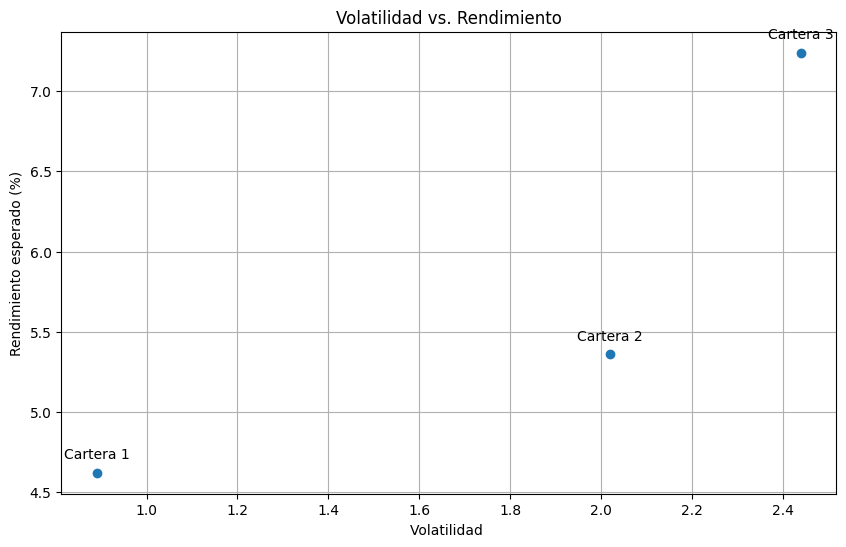

In [82]:
# Convert the list of dictionaries to a pandas DataFrame for easier plotting
portfolio_df = pd.DataFrame(portfolio_metricas)

plt.figure(figsize=(10, 6))
plt.scatter(portfolio_df['volatilidad'], portfolio_df['rendimiento'])
plt.xlabel('Volatilidad ')
plt.ylabel('Rendimiento esperado (%)')
plt.title('Volatilidad vs. Rendimiento')
plt.grid(True)

for i, row in portfolio_df.iterrows():
    plt.annotate(f"Cartera {int(row['portfolio_id'])}", (row['volatilidad'], row['rendimiento']), textcoords="offset points", xytext=(0,10), ha='center')

plt.show()

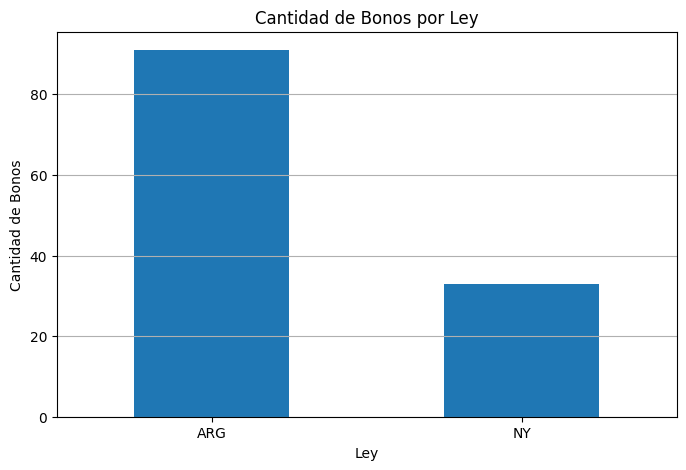

In [83]:
ley_counts = hd['Ley'].value_counts()

plt.figure(figsize=(8, 5))
ley_counts.plot(kind='bar')
plt.xlabel('Ley')
plt.ylabel('Cantidad de Bonos')
plt.title('Cantidad de Bonos por Ley')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

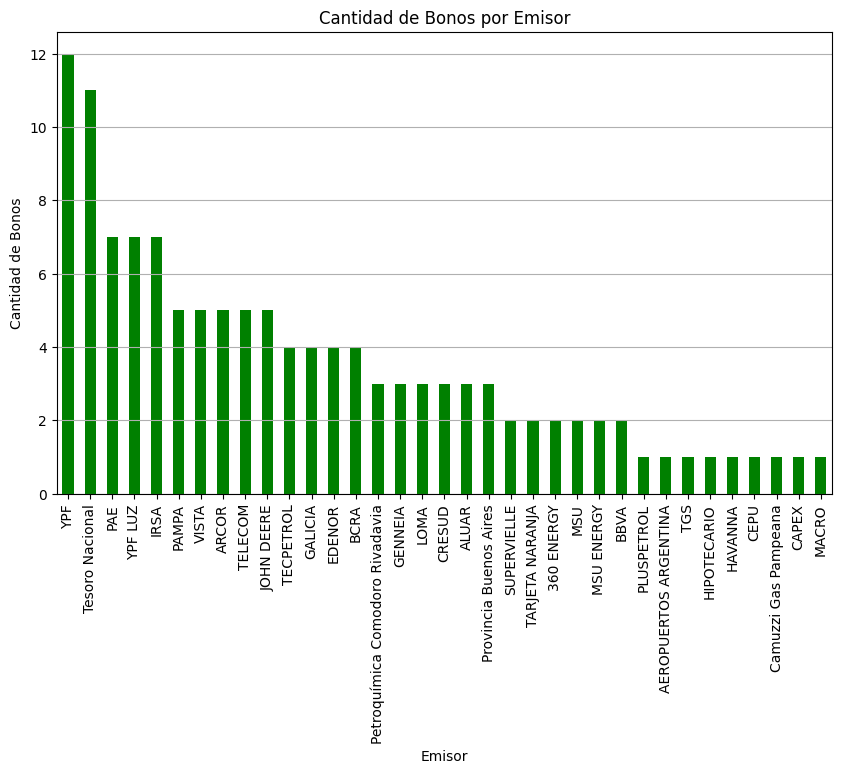

In [84]:
emisor_counts = hd['Emisor'].value_counts()

plt.figure(figsize=(10, 6))
emisor_counts.plot(kind='bar',color='green')
plt.xlabel('Emisor')
plt.ylabel('Cantidad de Bonos')
plt.title('Cantidad de Bonos por Emisor')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()

# Ejercicio 2

Este conjunto de datos representa las respuestas de 9 proveedores diferentes a una solicitud de cotización para un proyecto de construcción. La estructura es un formato matricial clásico, común en las adquisiciones. **Se sugiere observar primero la planilla en excel.**

In [85]:
df=pd.read_excel('Dataset ej2 Integración 1.2.xlsx')

In [86]:
df.head() #vean lo poco atractivo que es esto!

,Item,Unidad de medida,Cant,Descripcion,GALLARDO-DURAN S.A.S\nC.U.I.T. N° 30-71798629-2,GUERRERO NESTOR OMAR\n(Epu Hueney)\nC.U.I.T. N° 20-13968301-4,CORRALON MAYORISTA S.R.L.\nC.U.I.T. N° 30-70702698-3,CORRALÓN COMAHUE S.A.\nC.U.I.T. Nº 30-62556714-5,CURA CALQUIN S.R.L.\nC.U.I.T. Nº 30-64116857-9,SAKURA S.A.\nC.U.I.T. N° 30-70947725-7,LA CASA DEL INSTALADOR S. A.\nC.U.I.T. N° 30-58403615-6,SECOPLACK S.R.L.\nC.U.I.T. N° 30-71106323-0,SCANTAMBURLO DANTE EDUARDO\n(Dante Pinturerias)\nC.U.I.T. N° 20-12066388-8
0,NaN,NaN,NaN,NaN,P. UNIT.,P. UNIT.,P. UNIT.,P. UNIT.,P. UNIT.,P. UNIT.,P. UNIT.,P. UNIT.,P. UNIT.
1,1,m3,58.0,Calcáreo,---,---,---,---,---,---,---,---,---
2,2,Un,1.0,Rollo de 50 mts Nylon polietileno negro 200 mi...,No cotiza,97600,No cotiza,No cotiza,1593.75,No cotiza,No cotiza,No cotiza,No cotiza
3,3,Un,83.0,Cemento Portland Normal. Bolsa 50 kg,No cotiza,"$12.433,00 [1]","$11.599,56 [2]",No cotiza,"$12.710,98 [3]","$10.870,47 [4]",No cotiza,No cotiza,No cotiza
4,3.1,Un,2.0,PALLET P/CEMENTO,---,36300,32500,---,37097.37,---,---,---,---


In [87]:
#valores nulos
valores_faltantes=df.isna().sum().sum()
valores_faltantes_porcolumna= df.isna().sum()
valores_faltantes_porcolumna

Item                                                                          1
Unidad de medida                                                              7
Cant                                                                          7
Descripcion                                                                   7
GALLARDO-DURAN S.A.S\nC.U.I.T. N° 30-71798629-2                               5
GUERRERO NESTOR OMAR\n(Epu Hueney)\nC.U.I.T. N° 20-13968301-4                 6
CORRALON MAYORISTA S.R.L.\nC.U.I.T. N° 30-70702698-3                          6
CORRALÓN COMAHUE S.A.\nC.U.I.T. Nº 30-62556714-5                              6
CURA CALQUIN S.R.L.\nC.U.I.T. Nº 30-64116857-9                                6
SAKURA S.A.\nC.U.I.T. N° 30-70947725-7                                        6
LA CASA DEL INSTALADOR  S. A.\nC.U.I.T. N° 30-58403615-6                      6
SECOPLACK S.R.L.\nC.U.I.T. N° 30-71106323-0                                   6
SCANTAMBURLO DANTE EDUARDO\n(Dante Pintu

Vean que hay muchas celdas con la leyenda 'No Cotiza' ... ¿qué hacemos con esto?

In [88]:
for col in df.columns:
        for idx in df.index: #estamos anidando dos for para que python mire CELDA A CELDA
            celda = df.at[idx, col]
            if celda == 'No cotiza':
                df.at[idx, col] = np.nan
df.head()

,Item,Unidad de medida,Cant,Descripcion,GALLARDO-DURAN S.A.S\nC.U.I.T. N° 30-71798629-2,GUERRERO NESTOR OMAR\n(Epu Hueney)\nC.U.I.T. N° 20-13968301-4,CORRALON MAYORISTA S.R.L.\nC.U.I.T. N° 30-70702698-3,CORRALÓN COMAHUE S.A.\nC.U.I.T. Nº 30-62556714-5,CURA CALQUIN S.R.L.\nC.U.I.T. Nº 30-64116857-9,SAKURA S.A.\nC.U.I.T. N° 30-70947725-7,LA CASA DEL INSTALADOR S. A.\nC.U.I.T. N° 30-58403615-6,SECOPLACK S.R.L.\nC.U.I.T. N° 30-71106323-0,SCANTAMBURLO DANTE EDUARDO\n(Dante Pinturerias)\nC.U.I.T. N° 20-12066388-8
0,NaN,NaN,NaN,NaN,P. UNIT.,P. UNIT.,P. UNIT.,P. UNIT.,P. UNIT.,P. UNIT.,P. UNIT.,P. UNIT.,P. UNIT.
1,1,m3,58.0,Calcáreo,---,---,---,---,---,---,---,---,---
2,2,Un,1.0,Rollo de 50 mts Nylon polietileno negro 200 mi...,NaN,97600,NaN,NaN,1593.75,NaN,NaN,NaN,NaN
3,3,Un,83.0,Cemento Portland Normal. Bolsa 50 kg,NaN,"$12.433,00 [1]","$11.599,56 [2]",NaN,"$12.710,98 [3]","$10.870,47 [4]",NaN,NaN,NaN
4,3.1,Un,2.0,PALLET P/CEMENTO,---,36300,32500,---,37097.37,---,---,---,---


Repetimos la búsqueda de nulos

In [89]:
#valores nulos
valores_faltantes=df.isna().sum().sum()
valores_faltantes_porcolumna= df.isna().sum()
valores_faltantes_porcolumna

Item                                                                           1
Unidad de medida                                                               7
Cant                                                                           7
Descripcion                                                                    7
GALLARDO-DURAN S.A.S\nC.U.I.T. N° 30-71798629-2                               27
GUERRERO NESTOR OMAR\n(Epu Hueney)\nC.U.I.T. N° 20-13968301-4                  9
CORRALON MAYORISTA S.R.L.\nC.U.I.T. N° 30-70702698-3                          29
CORRALÓN COMAHUE S.A.\nC.U.I.T. Nº 30-62556714-5                              30
CURA CALQUIN S.R.L.\nC.U.I.T. Nº 30-64116857-9                                13
SAKURA S.A.\nC.U.I.T. N° 30-70947725-7                                        11
LA CASA DEL INSTALADOR  S. A.\nC.U.I.T. N° 30-58403615-6                      18
SECOPLACK S.R.L.\nC.U.I.T. N° 30-71106323-0                                   25
SCANTAMBURLO DANTE EDUARDO\n

Crear una columna que muestre el menor valor para cada producto

In [90]:
#examinemos un poco más la base
df

,Item,Unidad de medida,Cant,Descripcion,GALLARDO-DURAN S.A.S\nC.U.I.T. N° 30-71798629-2,GUERRERO NESTOR OMAR\n(Epu Hueney)\nC.U.I.T. N° 20-13968301-4,CORRALON MAYORISTA S.R.L.\nC.U.I.T. N° 30-70702698-3,CORRALÓN COMAHUE S.A.\nC.U.I.T. Nº 30-62556714-5,CURA CALQUIN S.R.L.\nC.U.I.T. Nº 30-64116857-9,SAKURA S.A.\nC.U.I.T. N° 30-70947725-7,LA CASA DEL INSTALADOR S. A.\nC.U.I.T. N° 30-58403615-6,SECOPLACK S.R.L.\nC.U.I.T. N° 30-71106323-0,SCANTAMBURLO DANTE EDUARDO\n(Dante Pinturerias)\nC.U.I.T. N° 20-12066388-8
0,NaN,NaN,NaN,NaN,P. UNIT.,P. UNIT.,P. UNIT.,P. UNIT.,P. UNIT.,P. UNIT.,P. UNIT.,P. UNIT.,P. UNIT.
1,1,m3,58.0,Calcáreo,---,---,---,---,---,---,---,---,---
2,2,Un,1.0,Rollo de 50 mts Nylon polietileno negro 200 mi...,NaN,97600,NaN,NaN,1593.75,NaN,NaN,NaN,NaN
3,3,Un,83.0,Cemento Portland Normal. Bolsa 50 kg,NaN,"$12.433,00 [1]","$11.599,56 [2]",NaN,"$12.710,98 [3]","$10.870,47 [4]",NaN,NaN,NaN
4,3.1,Un,2.0,PALLET P/CEMENTO,---,36300,32500,---,37097.37,---,---,---,---
5,4,m3,10.0,Arena común,49500,93603,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,5,Un,8.0,Hidrófugo líquido tipo Sika-1. Bidón 20 lts,NaN,38574.01,NaN,NaN,NaN,41898.35,NaN,NaN,NaN
7,5.1,Un,8.0,Hidrofugo x 20 lts Weber CERESITA,---,---,---,---,40921.27,---,---,---,---
8,6,Un,20.0,Cañería termofusión agua 25mm. Largo: 4mts,NaN,7788,NaN,NaN,9894.25,5876.48,9226.23,NaN,NaN
9,7,Un,5.0,Cañería termofusión agua 32mm. Largo: 4mts,NaN,12116,NaN,NaN,15391.26,9138.74,14352.11,NaN,NaN


In [91]:
#hasta la fila 35 tenemos productos, y el primer producto aparece en la fila 3, que python indexa como 2 porque empieza a contar
#desde 0

In [92]:
#a pesar de haber cambiado los 'No cotiza' hay otros strings...
for col in df.columns[6:]:
    df[col] = pd.to_numeric(df[col], errors='coerce')
# seleccionar desde la columna 5 hasta el final
df['Menor Valor'] = df.iloc[1:36, 6:].min(axis=1)
df.head()

,Item,Unidad de medida,Cant,Descripcion,GALLARDO-DURAN S.A.S\nC.U.I.T. N° 30-71798629-2,GUERRERO NESTOR OMAR\n(Epu Hueney)\nC.U.I.T. N° 20-13968301-4,CORRALON MAYORISTA S.R.L.\nC.U.I.T. N° 30-70702698-3,CORRALÓN COMAHUE S.A.\nC.U.I.T. Nº 30-62556714-5,CURA CALQUIN S.R.L.\nC.U.I.T. Nº 30-64116857-9,SAKURA S.A.\nC.U.I.T. N° 30-70947725-7,LA CASA DEL INSTALADOR S. A.\nC.U.I.T. N° 30-58403615-6,SECOPLACK S.R.L.\nC.U.I.T. N° 30-71106323-0,SCANTAMBURLO DANTE EDUARDO\n(Dante Pinturerias)\nC.U.I.T. N° 20-12066388-8,Menor Valor
0,NaN,NaN,NaN,NaN,P. UNIT.,P. UNIT.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,m3,58.0,Calcáreo,---,---,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Un,1.0,Rollo de 50 mts Nylon polietileno negro 200 mi...,NaN,97600,NaN,NaN,1593.75,NaN,NaN,NaN,NaN,1593.75
3,3,Un,83.0,Cemento Portland Normal. Bolsa 50 kg,NaN,"$12.433,00 [1]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3.1,Un,2.0,PALLET P/CEMENTO,---,36300,32500.0,NaN,37097.37,NaN,NaN,NaN,NaN,32500.00


Elaborar un data frame que tenga la lista de productos con el menor valor (precio unitario) para determinar el menor costo a incurrir en materiales de construcción

In [93]:
df_menor_valor = df[['Descripcion', 'Menor Valor']].dropna(subset=['Menor Valor'])
df_menor_valor

,Descripcion,Menor Valor
2,Rollo de 50 mts Nylon polietileno negro 200 mi...,1593.75
4,PALLET P/CEMENTO,32500.00
6,Hidrófugo líquido tipo Sika-1. Bidón 20 lts,41898.35
7,Hidrofugo x 20 lts Weber CERESITA,40921.27
8,Cañería termofusión agua 25mm. Largo: 4mts,5876.48
9,Cañería termofusión agua 32mm. Largo: 4mts,9138.74
10,Codo 90° HH termofusión agua 32mm,595.50
11,Codo 90° HH termofusión agua 25mm,424.64
12,Tee termofusión agua 32mm,894.05
13,Tee termofusión agua 25mm,614.15


Elaborar otro Data Frame que muestre los productos para la obra que quedaron sin cotizar. Esto es fundamental porque va a haber que pedir presupuesto a otros corralones de materiales o elaborar un plan de acción para no tener faltantes a la hora de empezar a construir.

In [94]:
df_sin_cotizar = df.iloc[:36][df.iloc[:36]['Menor Valor'].isna()][['Item', 'Descripcion']]
df_sin_cotizar

,Item,Descripcion
0,NaN,NaN
1,1,Calcáreo
3,3,Cemento Portland Normal. Bolsa 50 kg
5,4,Arena común
25,23,Masilla para exterior
26,23.1,Durlock.masilla x kg
30,24,"Pintura Látex interior, color blanco, marca Sh..."
31,24.1,RESOL LATEX PREMIUM LAVAB.ACRILI.INT/ EXTE.X 20l
33,25,Esmalte blanco 3-1 (aberturas)


Suponga que se ordenó priorizar la calidad del producto 'Cemento Portland Normal. Bolsa 50 kg', por lo que en vez de elegir la menor cotización se utilizará el que vende 'CURA CALQUIN S.R.L.'. Modifique la tabla de precios df_menor_valor

In [95]:
#busquemos el precio puntual que se necesita
cemento_precio_cura = df.loc[df['Descripcion'] == 'Cemento Portland Normal. Bolsa 50 kg', 'CURA CALQUIN S.R.L.\nC.U.I.T. Nº 30-64116857-9'].iloc[0]

#ahora lo cambiamos en nuestra tablita nueva
df_menor_valor.loc[df_menor_valor['Descripcion'] == 'Cemento Portland Normal. Bolsa 50 kg', 'Menor Valor'] = cemento_precio_cura

df_menor_valor

,Descripcion,Menor Valor
2,Rollo de 50 mts Nylon polietileno negro 200 mi...,1593.75
4,PALLET P/CEMENTO,32500.00
6,Hidrófugo líquido tipo Sika-1. Bidón 20 lts,41898.35
7,Hidrofugo x 20 lts Weber CERESITA,40921.27
8,Cañería termofusión agua 25mm. Largo: 4mts,5876.48
9,Cañería termofusión agua 32mm. Largo: 4mts,9138.74
10,Codo 90° HH termofusión agua 32mm,595.50
11,Codo 90° HH termofusión agua 25mm,424.64
12,Tee termofusión agua 32mm,894.05
13,Tee termofusión agua 25mm,614.15


In [96]:
#creamos una fila de totales para ver cuanto vamos a gastar
df_menor_valor.loc()['TOTAL']=df_menor_valor['Menor Valor'].sum()
df_menor_valor

,Descripcion,Menor Valor
2,Rollo de 50 mts Nylon polietileno negro 200 mi...,1593.75
4,PALLET P/CEMENTO,32500.00
6,Hidrófugo líquido tipo Sika-1. Bidón 20 lts,41898.35
7,Hidrofugo x 20 lts Weber CERESITA,40921.27
8,Cañería termofusión agua 25mm. Largo: 4mts,5876.48
9,Cañería termofusión agua 32mm. Largo: 4mts,9138.74
10,Codo 90° HH termofusión agua 32mm,595.50
11,Codo 90° HH termofusión agua 25mm,424.64
12,Tee termofusión agua 32mm,894.05
13,Tee termofusión agua 25mm,614.15


Fuentes:

[Bondapp](https://porabajo.streamlit.app/)

"Notas de Análisis Matemático I Teórico Prácticas." María José Bianco, Andrea Gache, Roberto A. García, Gustavo Zorzoli.	2022. Primera edición. Editorial	Facutad de Ciencias Económicas, Universidad de Buenos Aires

Hilpisch, Y. (2018). Python for Finance: Mastering Data-Driven Finance (2nd ed.). O’Reilly Media.